In [1]:
# Classes created by Paul Story
from rb_model import RbModel
from simulation import RbSim
from net_plot import NetPlot
from null_model import NullModel

# Import Other Packages
import copy
import numpy as np
import networkx as nx

### First we create our real network and set it as an atttribute on our plotting class

In [2]:
# Creates an instance of the real world model
base_model = RbModel(nx.Graph())
# Builds the graph and calculates initial stats
base_model.build()
# Create a copy of the model for simulation
sim_model = copy.deepcopy(base_model)

G = base_model.G
# Create an instance of the plot class that handles... plotting of the real network
base_plt = NetPlot()
# Assigns real model network for plotting
base_plt.G = G

### Critial Threshold of Real Network

In [3]:
base_model.fc

0.6384720327421556

### Some inital conditions and statistics before simulation 
This is done just to get a rough idea of what we are looking at

In [4]:
base_model.stats()

STATS
BEFORE ATTACK
Number of connected components: 1
Size of the largest connected component: 190
clustering coefficient: 0.201077694235589, shortest path per component: [8.322584238373713]


Nodes

In [5]:
nx.number_of_nodes(G)

190

Edges

In [6]:
nx.number_of_edges(G)

265

Density

In [7]:
nx.density(G)

0.014759120022277916

Diameter: The longest shortest path

In [8]:
nx.diameter(G)

21

Average Degree

In [9]:
base_model.k_avg

2.789473684210526

In [10]:
nx.number_connected_components(G)

1

In [11]:
nx.average_shortest_path_length(G)

8.322584238373713

Min / Max Degrees

In [12]:
degrees = [G.degree(n) for n in G.nodes()]
kmin = min(degrees)
kmax = max(degrees)
print(kmin)
print(kmax)

1
9


Assortativity

In [13]:
nx.degree_assortativity_coefficient(G)

-0.12072165296320875

### Plots out our unmodified real network

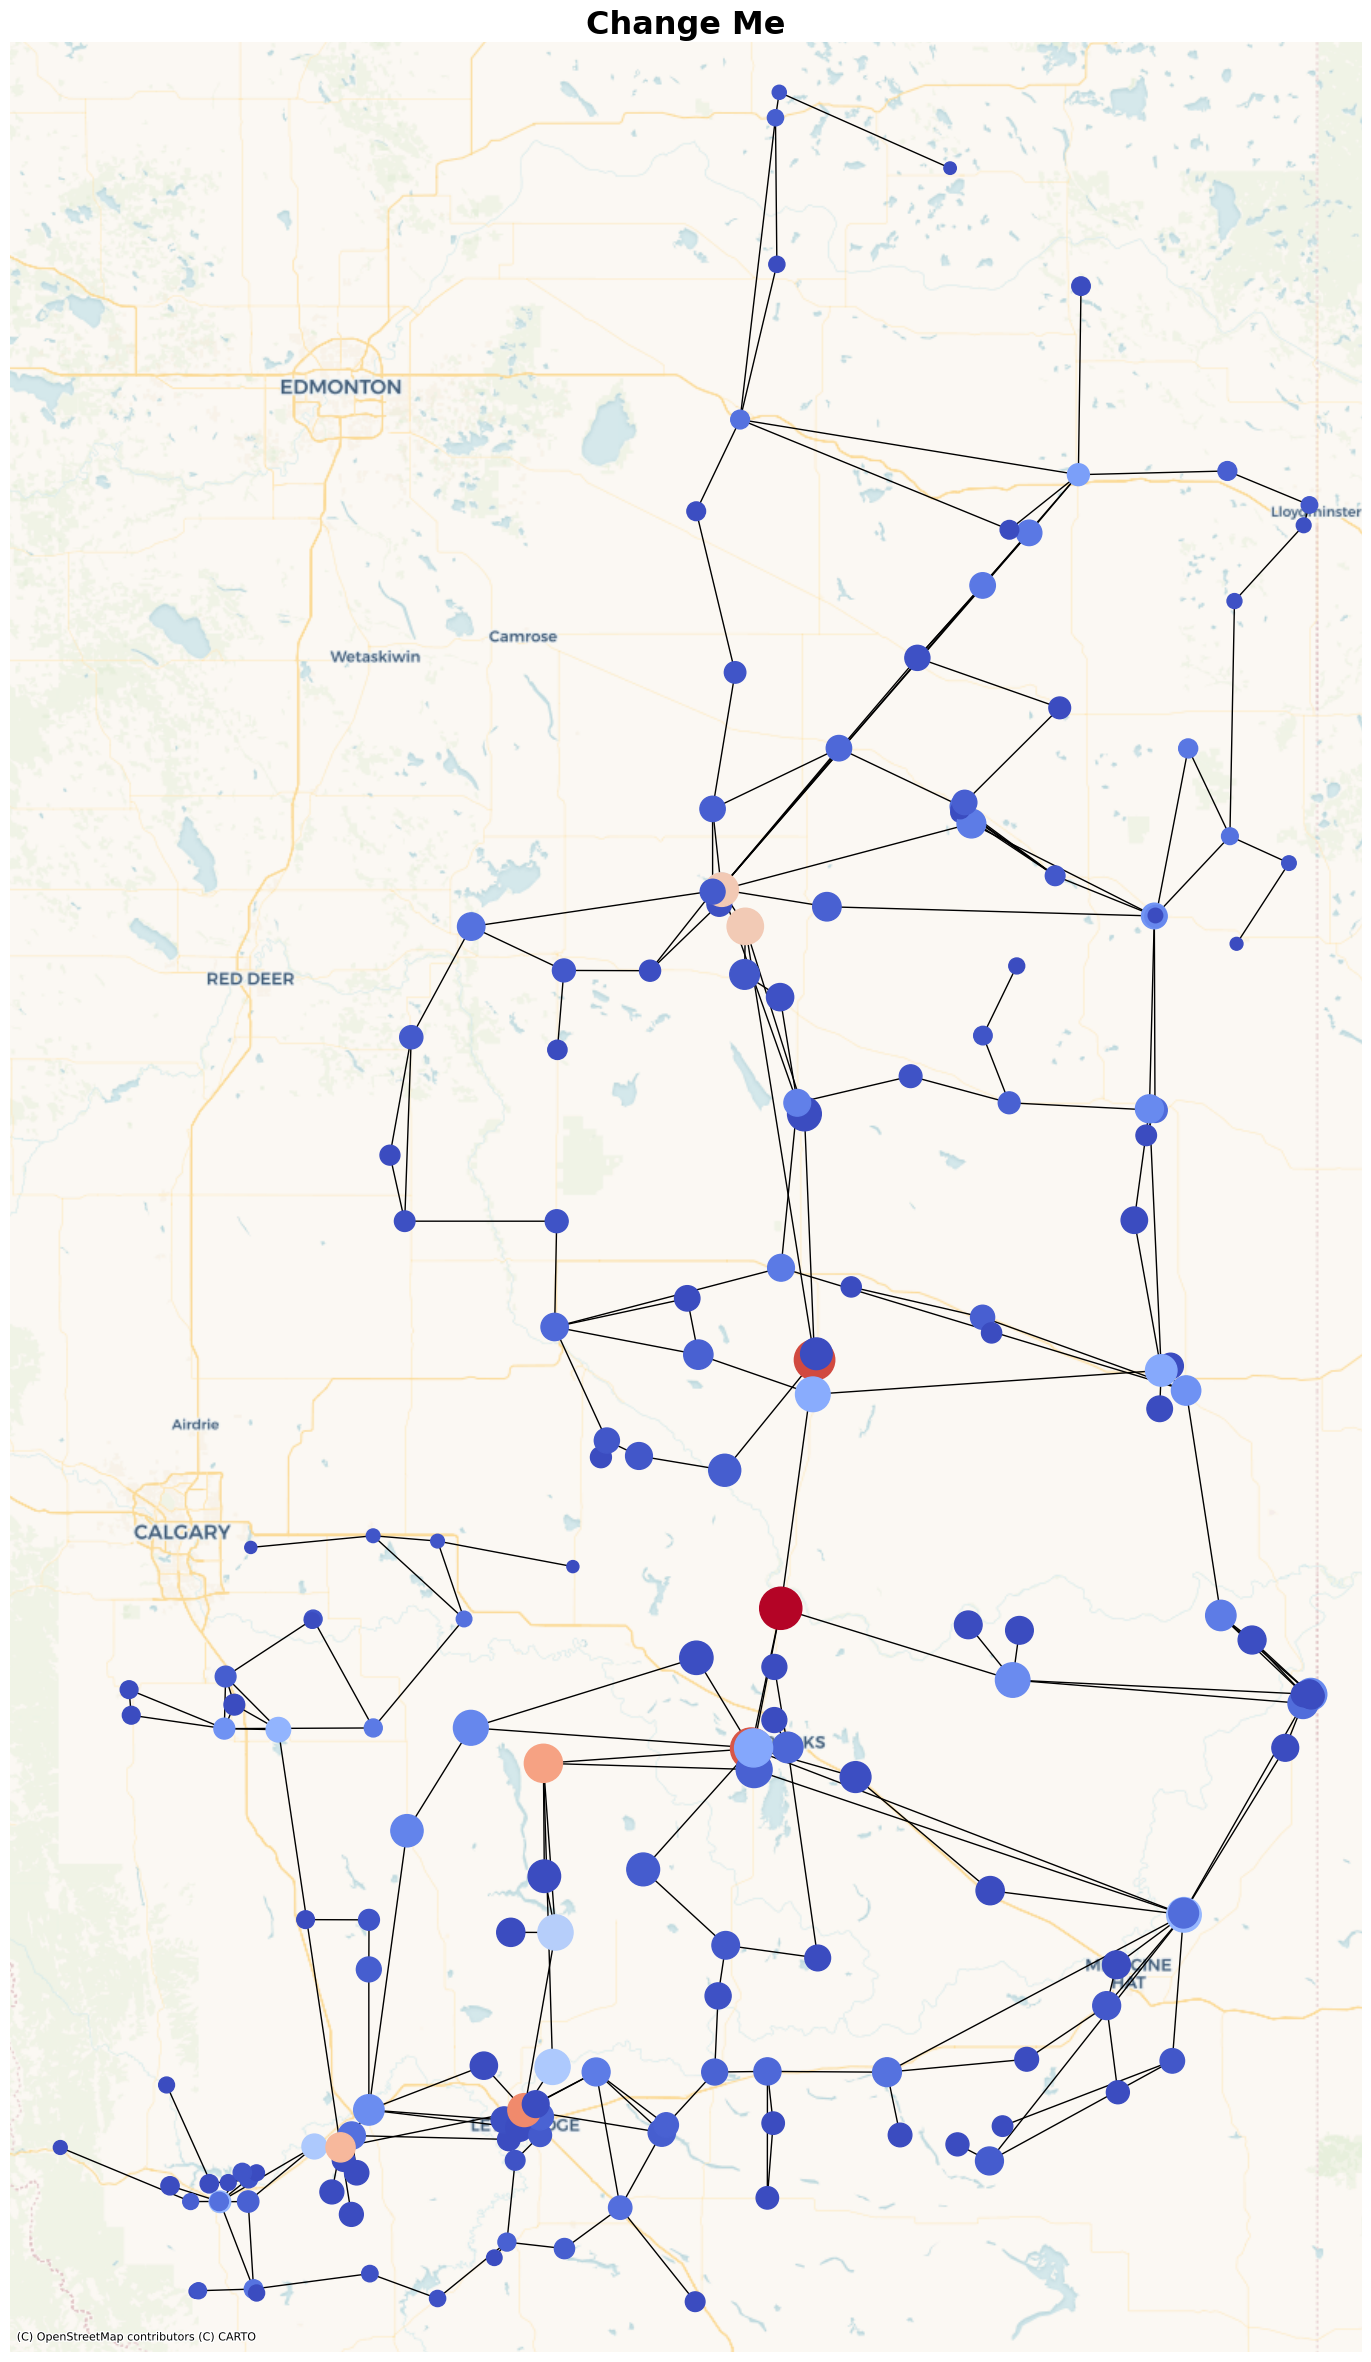

In [14]:
base_plt.plot_network()

### Create Null Model and give it the real network as a starting point
Assigns the location data from the real network to the null model

In [15]:
null_model = NullModel(base_model)
null_model.pos_mercator = copy.deepcopy(base_plt.pos_mercator)

### Sets the radius and builds the null model

In [16]:
null_model.radius = 77147
null_model.build()
sim_null_model = copy.deepcopy(null_model)

### Critical threshold of null model

In [17]:
null_model.fc

0.9358974358974359

Comparison of the diameter of the base network vs the random network

In [18]:
nx.diameter(null_model.G)

21

Theoretical diameter calculation from Cohen et al paper referenced in project paper. It is notable that the network diameter calculation is quite different. It was not clear to me if this was possibly due to some of the data issues we had or if there was a more fundamental difference here. That said the networkx value makes more sense to me given the average shortest path calculation

In [19]:
np.log(np.log(nx.number_of_nodes(G)))

1.657661072489074

In [20]:
nx.diameter(null_model.rgg)

18

### Create simulation and provide the models prepped for simulation for both the real and null models

In [21]:
sim = RbSim(sim_model, sim_null_model)

### Create plot objects for the simulations

In [22]:
sim.level = 1
sim.nplt = NetPlot()
sim.nplt.G = sim_model.G
sim.nplt.GN = sim_null_model.G
sim.nplt.RGG = sim_null_model.rgg
sim.nplt.save = True

### Run random simulation

In [23]:
sim.run_sim_random(1)

run: 0
null 0: Fc: 0.94, lg_con_comp: 190, <k>=11.9474
attacking: null Graph with 190 nodes and 265 edges
remove g
remove rgg
189 189 189 189 189
null 1: Fc: 0.94, lg_con_comp: 189, <k>=11.9153
attacking: null Graph with 189 nodes and 263 edges
remove g
remove rgg
188 188 188 188 188
null 2: Fc: 0.94, lg_con_comp: 188, <k>=11.8936
attacking: null Graph with 188 nodes and 260 edges
remove g
remove rgg
187 187 187 187 187
null 3: Fc: 0.94, lg_con_comp: 187, <k>=11.8717
attacking: null Graph with 187 nodes and 254 edges
remove g
remove rgg
186 186 186 186 186
null 4: Fc: 0.94, lg_con_comp: 186, <k>=11.8387
attacking: null Graph with 186 nodes and 253 edges
remove g
remove rgg
185 185 185 185 185
null 5: Fc: 0.94, lg_con_comp: 185, <k>=11.8162
attacking: null Graph with 185 nodes and 248 edges
remove g
remove rgg
184 184 184 184 184
null 6: Fc: 0.94, lg_con_comp: 184, <k>=11.7391
attacking: null Graph with 184 nodes and 246 edges
remove g
remove rgg
183 183 183 183 183
null 7: Fc: 0.94, lg

### Reset the model

In [24]:
sim.model.build()

### Run the betweeness targeted simulation

In [25]:
sim.run_sim_target_btwn()

run: 0
run: 0
base 0: Crit_Thres: 0.64, % removed(0.0) lg_con_comp: 190, k_avg:2.7895
attacking: base Graph with 190 nodes and 265 edges
base 1: Crit_Thres: 0.64, % removed(1.0) lg_con_comp: 189, k_avg:2.7619
attacking: base Graph with 189 nodes and 261 edges
base 2: Crit_Thres: 0.64, % removed(1.0) lg_con_comp: 97, k_avg:2.6915
attacking: base Graph with 188 nodes and 253 edges
base 3: Crit_Thres: 0.64, % removed(2.0) lg_con_comp: 97, k_avg:2.631
attacking: base Graph with 187 nodes and 246 edges
base 4: Crit_Thres: 0.64, % removed(2.0) lg_con_comp: 96, k_avg:2.5484
attacking: base Graph with 186 nodes and 237 edges
base 5: Crit_Thres: 0.64, % removed(3.0) lg_con_comp: 95, k_avg:2.5081
attacking: base Graph with 185 nodes and 232 edges
base 6: Crit_Thres: 0.64, % removed(3.0) lg_con_comp: 93, k_avg:2.4783
attacking: base Graph with 184 nodes and 228 edges
base 7: Crit_Thres: 0.64, % removed(4.0) lg_con_comp: 74, k_avg:2.4372
attacking: base Graph with 183 nodes and 223 edges
base 8: C